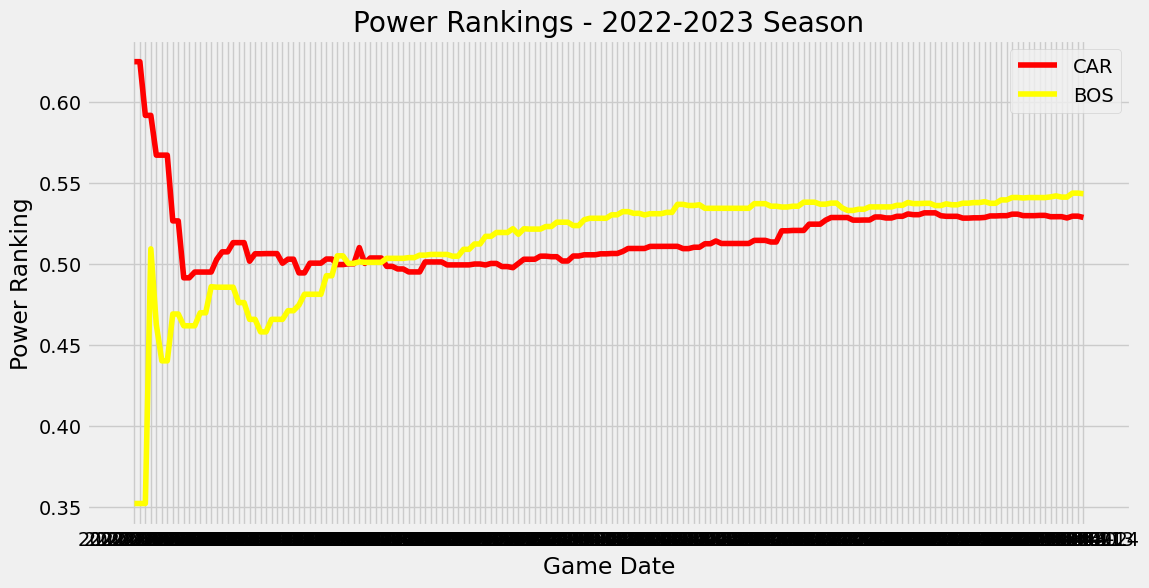

In [25]:
from matplotlib import legend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from src.utility.constants import *
from src.utility.personal import *
from src.utility.structure import *
from src.utility.storage import *
from src.utility.math import *

from src.avgs import *
from src.trajectory import *

from src.relative_data.power_rank import *
from src.relative_data.sos import *
from src.situational_data.home_away import *

from src.model.model import *
from src.model.target import *

from src.init_DFs.season_odds import *

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

szn = "2022"
sit = "all"

df = pd.read_csv("databases/BY_TEAM/POWER_RANK/POWER_RANK_SZN_5on5.csv")
df = df[["CAR", "BOS", "game_date"]]
df = df[df["game_date"] >= "2022-10-12"]
df.dropna(inplace=True)
plt.figure(figsize=(12, 6))
plt.title("Power Rankings - 2022-2023 Season")
plt.xlabel("Game Date")
plt.ylabel("Power Ranking")
plt.grid(True)
plt.plot(df["game_date"], df["CAR"], label="CAR", color="red")
plt.plot(df["game_date"], df["BOS"], label="BOS", color="yellow")
plt.legend()
plt.show()

In [2]:
szn = "all"
sit = "5on5"
target = "profit"
#df = retrieve_csv(szn, sit, "ROLLING_8", subfol="ROLLING")
df = primary_csv()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Michael Beebe/OneDrive - University of North Carolina at Chapel Hill/Desktop/bet-nhl-data/all/5on5.csv'

In [10]:
# TEST
szn = 2019
sample_szns = 3

t = df[((df.season > szn - sample_szns) & (df.season <= szn))].season

t

7380     2017
7381     2017
7382     2017
7383     2017
7384     2017
         ... 
14621    2019
14622    2019
14623    2019
14624    2019
14625    2019
Name: season, Length: 7246, dtype: int64

In [62]:
# MODEL
mod = NHLModel(df, szn, sit, target)
mod.prepare()

mod.add_playoff_odds()
mod.add_points_odds()

mod.drop_nulls()

mod.df

,game_id,team,opp_team,season,game_number,next_game_id,score,opp_score,win,reg_win,...,target_rest,target_is_home,target_odds,target_opp_odds,target_ot_odds,playoff_make_odds,playoff_miss_odds,pts_exp,pts_over_odds,pts_under_odds
0,2014-10-08BOSPHI,BOS,PHI,2014,1,2014-10-09DETBOS,2,1,1,1,...,24.0,0.0,0.41494,0.38911,0.26110,0.909091,0.142857,1.310976,0.534884,0.534884
1,2014-10-08BOSPHI,PHI,BOS,2014,1,2014-10-09PHINJD,1,2,0,0,...,23.5,1.0,0.43478,0.37037,0.26042,0.523810,0.545455,1.079268,0.534884,0.534884
2,2014-10-08CGYVAN,CGY,VAN,2014,1,2014-10-09EDMCGY,2,4,0,0,...,23.5,0.0,0.34130,0.47170,0.25253,0.250000,0.800000,0.884146,0.534884,0.534884
3,2014-10-08CGYVAN,VAN,CGY,2014,1,2014-10-11VANEDM,4,2,1,1,...,72.0,1.0,0.54645,0.27701,0.24038,0.408163,0.636364,1.079268,0.534884,0.534884
4,2014-10-08LAKSJS,LAK,SJS,2014,1,2014-10-11ARILAK,0,4,0,0,...,71.0,0.0,0.46083,0.34602,0.25063,0.888889,0.166667,1.274390,0.534884,0.534884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,2023-04-13WSHNJD,WSH,NJD,2022,82,NaN,4,5,0,0,...,NaN,NaN,NaN,NaN,NaN,0.615385,0.434783,1.152439,0.534884,0.534884
21542,2023-04-14CBJBUF,BUF,CBJ,2022,82,NaN,5,2,1,1,...,NaN,NaN,NaN,NaN,NaN,0.235294,0.818182,0.945122,0.555556,0.512195
21543,2023-04-14CBJBUF,CBJ,BUF,2022,82,NaN,2,5,0,0,...,NaN,NaN,NaN,NaN,NaN,0.181818,0.875000,0.969512,0.534884,0.534884
21544,2023-04-14NSHCOL,COL,NSH,2022,82,NaN,4,3,1,1,...,NaN,NaN,NaN,NaN,NaN,0.980392,0.066667,1.359756,0.534884,0.534884


In [63]:
mod.x
#mod.data.win.corr(mod.df.target)

,score,opp_score,win,reg_win,overtime,odds,opp_odds,ot_odds,rest,is_home,...,target_rest,target_is_home,target_odds,target_opp_odds,target_ot_odds,playoff_make_odds,playoff_miss_odds,pts_exp,pts_over_odds,pts_under_odds
14,1,2,0,0,0,0.41494,0.38911,0.26110,24.000000,0,...,47.5,1.0,0.52356,0.29586,0.24390,0.909091,0.142857,1.310976,0.534884,0.534884
16,5,2,1,1,0,0.34130,0.47170,0.25253,23.500000,0,...,45.5,0.0,0.25000,0.58140,0.23364,0.250000,0.800000,0.884146,0.534884,0.534884
23,4,6,0,0,0,0.43478,0.37037,0.26042,23.500000,1,...,48.0,1.0,0.40984,0.40161,0.25189,0.523810,0.545455,1.079268,0.534884,0.534884
30,2,1,1,0,1,0.34130,0.46948,0.25126,24.000000,0,...,48.0,0.0,0.40161,0.40984,0.25189,0.750000,0.294118,1.164634,0.555556,0.512195
34,3,2,1,0,1,0.34602,0.46083,0.25063,47.000000,1,...,97.5,1.0,0.55866,0.27473,0.23202,0.333333,0.722222,1.030488,0.512195,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21263,1,5,0,0,0,0.37594,0.44444,0.23923,53.916667,0,...,74.0,1.0,0.69444,0.17857,0.18657,0.222222,0.833333,0.993902,0.555556,0.500000
21264,1,5,0,0,0,0.44444,0.37453,0.23810,48.500000,0,...,71.5,1.0,0.46729,0.35088,0.23419,0.377358,0.666667,1.091463,0.534884,0.534884
21265,5,1,1,1,0,0.37453,0.44444,0.23810,50.416667,1,...,48.0,0.0,0.42194,0.39526,0.24213,0.565217,0.500000,1.140244,0.534884,0.534884
21266,2,5,0,0,0,0.48780,0.34722,0.22272,50.000000,0,...,48.5,0.0,0.33784,0.49751,0.22422,0.875000,0.181818,1.286585,0.534884,0.534884


In [61]:
df_cor = pd.DataFrame()
df_cor['target'] = pd.Series(mod.target)
y = mod.data.target.copy()
print(df_cor)
for col in mod.x.columns:
    df_temp = df_cor.copy()
    df_temp[col] = mod.data[col].copy().corr(y)
    df_cor = df_temp.copy()
    
df_cor

   target
0  profit


,target,score,opp_score,win,reg_win,overtime,odds,opp_odds,ot_odds,is_home,...,scoreFlurryAdjustedTotalShotCredit,target_is_home,target_odds,target_opp_odds,target_ot_odds,playoff_make_odds,playoff_miss_odds,pts_exp,pts_over_odds,pts_under_odds
0,profit,-0.007961,-0.006809,-0.003777,-0.004806,0.004404,-0.000329,-0.000533,0.004969,-0.007579,...,0.003666,0.001155,0.001683,-0.002519,0.004454,0.002496,-0.002065,0.000955,-0.003702,0.002725


In [6]:
df_temp["playoff_make_odds"] = po.playoff_make_odds.iloc[0]
df_temp


,game_id,team,opp_team,season,game_number,next_game_id,score,opp_score,win,reg_win,...,unblockedShotAttempts,scoreAdjustedUnblockedShotAttempts,dZoneGiveaways,xGoalsFromxReboundsOfShots,xGoalsFromActualReboundsOfShots,reboundxGoals,totalShotCredit,scoreAdjustedTotalShotCredit,scoreFlurryAdjustedTotalShotCredit,playoff_make_odds
0,2018-10-04CARNYI,CAR,NYI,2018,1,2018-10-05CBJCAR,1,2,0,0,...,54,51.130,2,0.504,0.354,0.354,2.772,2.607,2.535,0.377358
1,2018-10-05CBJCAR,CAR,CBJ,2018,2,2018-10-07CARNYR,3,1,1,1,...,43,47.094,0,0.443,0.612,0.612,2.418,2.640,2.542,0.377358
2,2018-10-07CARNYR,CAR,NYR,2018,3,2018-10-09CARVAN,8,5,1,1,...,46,44.215,5,0.437,0.533,0.533,2.534,2.413,2.402,0.377358
3,2018-10-09CARVAN,CAR,VAN,2018,4,2018-10-13MINCAR,5,3,1,1,...,37,38.428,3,0.362,0.418,0.418,2.120,2.121,2.066,0.377358
4,2018-10-13MINCAR,CAR,MIN,2018,5,2018-10-14WPGCAR,5,4,1,0,...,30,31.202,0,0.288,0.267,0.267,1.544,1.624,1.593,0.377358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2019-03-30CARPHI,CAR,PHI,2018,78,2019-03-31PITCAR,5,2,1,1,...,46,46.963,6,0.438,1.399,1.399,3.180,3.142,3.061,0.377358
78,2019-03-31PITCAR,CAR,PIT,2018,79,2019-04-02TORCAR,1,3,0,0,...,39,37.811,2,0.361,0.280,0.280,1.816,1.803,1.781,0.377358
79,2019-04-02TORCAR,CAR,TOR,2018,80,2019-04-04CARNJD,4,1,1,1,...,48,52.620,3,0.458,0.256,0.256,2.846,3.103,3.070,0.377358
80,2019-04-04CARNJD,CAR,NJD,2018,81,2019-04-06PHICAR,3,1,1,1,...,34,34.214,4,0.295,0.195,0.195,2.082,2.031,2.022,0.377358


In [28]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import preprocessing


In [34]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [35]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

lab_enc = preprocessing.LabelEncoder()
encoded_Y = lab_enc.fit_transform(mod.y)


for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, mod.x, encoded_Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

LR: 0.614731 (0.005594)
LDA: 0.570477 (0.010639)


C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "C:\wamp64\www\bet-nhl-model\myenv\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method

KNN: nan (nan)
CART: 0.363045 (0.008273)
NB: 0.001302 (0.000434)
SVM: 0.614731 (0.005594)


KNN: nan (nan)
CART: 0.363045 (0.008273)
NB: 0.001302 (0.000434)
SVM: 0.614731 (0.005594)


In [32]:
encoded_Y

array([ 0,  0,  0, ...,  0, 48,  0], dtype=int64)

In [12]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

game_number
rest
target
target_opp_team
target_game_date
target_game_time
target_rest
target_is_home
target_odds
target_opp_odds
target_ot_odds


In [10]:
sos.insert(0, "game_date", 0)
sos

NameError: name 'sos' is not defined

In [ ]:
export_csv(pr, 'all', '5on5', name="POWER_RANK_OVER_EXP", subfol="POWER_RANK", tidy=False)